In [2]:
!pip install transformers sentence-transformers torch --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np

#učitavanje dataseta direktno sa GitHub-a
url = "https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv"
df = pd.read_csv(url)

In [4]:
#prikaz prvih 5 redova
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [5]:
#osnovne informacije o kolonama
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1163 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

In [6]:
#Provera nedostajućih vrednosti
df.isnull().sum()


,0
Unnamed: 0,0
Species,0
Owner,7
Country.of.Origin,1
Farm.Name,356
Lot.Number,1041
Mill,310
ICO.Number,148
Company,209
Altitude,223


In [7]:
region_cnts = df['Region'].value_counts()
region_cnts.describe()

,count
count,343.000000
mean,3.655977
std,9.443802
min,1.000000
25%,1.000000
50%,1.000000
75%,2.500000
max,112.000000


In [8]:
#Biramo samo korisne kolone
relevantne_kolone = [
    'Country.of.Origin', 'Processing.Method', 'altitude_mean_meters',
    'Acidity', 'Aroma', 'Flavor', 'Aftertaste', 'Body', 'Balance', 'Uniformity',
    'Total.Cup.Points'
]

df_clean = df[relevantne_kolone].dropna()

In [9]:
#prosli pristup sam koristila jer mi je bio najsličniji pristupima iz predmeta Inteligentni sistemi, ali sam ispravila sad na uobičajen model

# Ispravna dopuna nedostajućih vrednosti
df['Region'] = df['Region'].fillna("Unknown")
df['Processing.Method'] = df['Processing.Method'].fillna("Unknown")

# Tekst za BERT: sad su svi tekstovi validni
df['text_for_bert'] = df['Region'] + " " + df['Processing.Method']

# Numeričke kolone: dopuna srednjom vrednošću
numericke_kolone = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'altitude_mean_meters']
df[numericke_kolone] = df[numericke_kolone].fillna(df[numericke_kolone].mean())
X_numeric = df[numericke_kolone]




In [12]:
# korišćenje dummies kako ste preporučili
from sklearn.preprocessing import StandardScaler


if 'Region' in df.columns and 'Processing.Method' in df.columns:
    # Grupisanje retkih regiona
    top_regions = df['Region'].value_counts().nlargest(10).index
    df['Region'] = df['Region'].apply(lambda x: x if x in top_regions else 'Other')

    # Popunjavanje nedostajućih vrednosti
    df['Region'] = df['Region'].fillna('Unknown')
    df['Processing.Method'] = df['Processing.Method'].fillna('Unknown')

    # Konverzija kategorijskih kolona u dummies
    df = pd.get_dummies(df, columns=['Region', 'Processing.Method'], drop_first=True)

# Nastavi skaliranje numeričkih + kategorijskih
numericke_kolone = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'altitude_mean_meters']
df[numericke_kolone] = df[numericke_kolone].fillna(df[numericke_kolone].mean())

kolone_kategorije = [col for col in df.columns if col.startswith('Region_') or col.startswith('Processing.Method_')]
X_scaled = StandardScaler().fit_transform(df[numericke_kolone + kolone_kategorije])



In [13]:
df_clean.shape

(1005, 11)

In [14]:
#pravi 3 nove kategorije ocene kvaliteta kafe i brise originalnu

def oceni_kafu(score):
    if score < 80:
        return 'loša'
    elif score < 85:
        return 'srednja'
    else:
        return 'vrhunska'

df_clean['kategorija_kvaliteta'] = df_clean['Total.Cup.Points'].apply(oceni_kafu)
df_clean = df_clean.drop(columns=['Total.Cup.Points'])


In [ ]:
df_clean.head()

,Country.of.Origin,Processing.Method,altitude_mean_meters,Acidity,Aroma,Flavor,Aftertaste,Body,Balance,Uniformity,kategorija_kvaliteta
0,Ethiopia,Washed / Wet,2075.0,8.75,8.67,8.83,8.67,8.50,8.42,10.0,vrhunska
1,Ethiopia,Washed / Wet,2075.0,8.58,8.75,8.67,8.50,8.42,8.42,10.0,vrhunska
3,Ethiopia,Natural / Dry,2000.0,8.42,8.17,8.58,8.42,8.50,8.25,10.0,vrhunska
4,Ethiopia,Washed / Wet,2075.0,8.50,8.25,8.50,8.25,8.42,8.33,10.0,vrhunska
9,Ethiopia,Natural / Dry,1822.5,8.50,8.08,8.58,8.50,7.67,8.42,10.0,vrhunska


In [15]:
#uklanjanje originalne kolone sa ocenom

df_encoded = pd.get_dummies(df_clean)


In [16]:

#Priprema ulaza i glavne promenljive
X = df_encoded.drop(columns=['kategorija_kvaliteta_loša', 'kategorija_kvaliteta_srednja', 'kategorija_kvaliteta_vrhunska'], errors='ignore')
y = df_encoded[['kategorija_kvaliteta_loša', 'kategorija_kvaliteta_srednja', 'kategorija_kvaliteta_vrhunska']]

In [17]:
#trening i test set


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 80% trening / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizacija
scaler = StandardScaler()
X_combined = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
#kreiranje i treniranje neuronske mreze

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#broj ulaznih osobina (broj kolona u X)

input_dim = X_combined.shape[1]

#kreiranje modela

##JJ: kako ste se opredelili bas za ovu arhitekturu mreze? jeste li probali jos neku alternativnu? - arhitektura je najjednostavnija da bi najpreciznije pokazale sve tri kategorije,
##sam model je mali, te je bilo najlakše da se odradi što preciznija kategorizacija

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

#Kompajliranje modela

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#treniranje modela

history = model.fit(
    X_combined, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6513 - loss: 0.8696 - val_accuracy: 0.8634 - val_loss: 0.4612
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8791 - loss: 0.4483 - val_accuracy: 0.9006 - val_loss: 0.3014
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9142 - loss: 0.2961 - val_accuracy: 0.9130 - val_loss: 0.2448
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9158 - loss: 0.2499 - val_accuracy: 0.9130 - val_loss: 0.2163
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9347 - loss: 0.2002 - val_accuracy: 0.9255 - val_loss: 0.1961
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9525 - loss: 0.1472 - val_accuracy: 0.9068 - val_loss: 0.1908
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9354 - loss: 0.1494 - val_accuracy: 0.9068 - val_loss: 0.1982
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9430 - loss: 0.1525 - val_accuracy: 0.9317 - val_loss: 0.1907
Epo

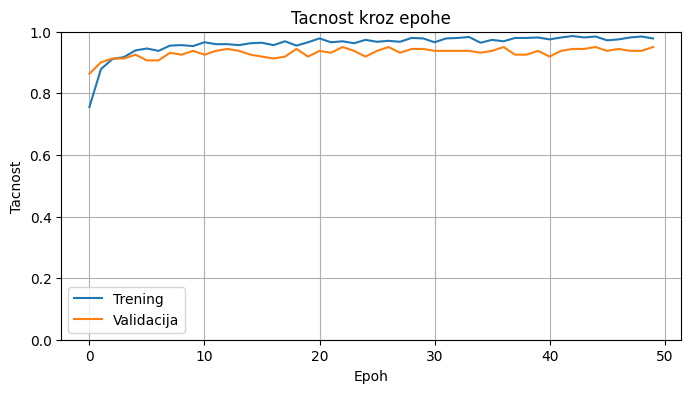

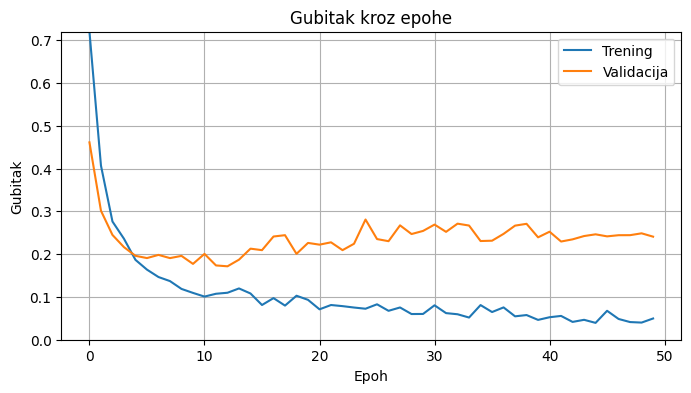

In [19]:
import matplotlib.pyplot as plt

# Tačnost


plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Trening')
plt.plot(history.history['val_accuracy'], label='Validacija')
plt.title('Tacnost kroz epohe')
plt.xlabel('Epoh')
plt.ylabel('Tacnost')
plt.ylim(0, 1)  # skaliranje y ose
plt.legend()
plt.grid(True)
plt.show()

# Gubitak
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Trening')
plt.plot(history.history['val_loss'], label='Validacija')
plt.title('Gubitak kroz epohe')
plt.xlabel('Epoh')
plt.ylabel('Gubitak')
plt.ylim(0, max(history.history['loss'] + history.history['val_loss']))  # dinamičko skaliranje
plt.legend()
plt.grid(True)
plt.show()


In [20]:
#Evaluacija na test skupu
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Tačnost na test skupu: {test_acc:.2f}")

Tačnost na test skupu: 0.90


JJ: ovo je jako slaba tacnost

In [21]:
#cuvanje modela u .h5 formatu
model.save("model_kvalitet_kafe.h5")
print("Model sačuvan kao model_kvalitet_kafe.h5")


Model sačuvan kao model_kvalitet_kafe.h5


In [22]:
#Uzmi jedan primer iz test skupa
import numpy as np

sample = X_test_scaled[0].reshape(1, -1)
prediction = model.predict(sample)

# Mapiranje rezultata nazad u klasu
klase = ['loša', 'srednja', 'vrhunska']
predicted_class = klase[np.argmax(prediction)]

print(f"Model predviđa da je kafa: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Model predviđa da je kafa: loša


In [23]:
#Predikcije za ceo test skup
y_pred_probs = model.predict(X_test_scaled)
y_pred_classes = [klase[np.argmax(row)] for row in y_pred_probs]

#cuvanje u csv file predikcije
df_rezultat = pd.DataFrame({
    'Predikcija': y_pred_classes
})
df_rezultat.to_csv("predikcije_kafe.csv", index=False)

print("Predikcije su sačuvane u predikcije_kafe.csv")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Predikcije su sačuvane u predikcije_kafe.csv


Izveštaj klasifikacije:

              precision    recall  f1-score   support

           0       0.91      0.72      0.81        29
           1       0.92      0.96      0.94       161
           2       0.56      0.45      0.50        11

    accuracy                           0.90       201
   macro avg       0.80      0.71      0.75       201
weighted avg       0.90      0.90      0.90       201



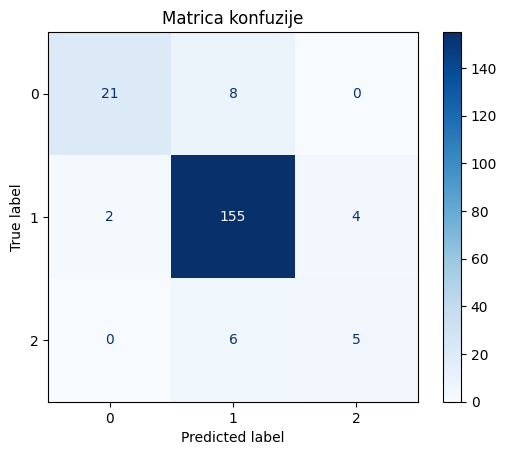

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

#Konverzija y_test iz one-hot u klase
y_test_classes = np.argmax(y_test, axis=1)

# #Izveštaj klasifikacije
print("Izveštaj klasifikacije:\n")

y_pred_num = [np.argmax(row) for row in y_pred_probs]
print(classification_report(y_test_classes, y_pred_num))

# #Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_num)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrica konfuzije")
plt.show()